In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['GLA', 'BMA']
patterns1= ['GLA(*_*_)]-BMA(*_*_)', 'GLA(*_*_)-BMA(*_*_)','GLA(*_*_)]-[*]-BMA(*_*_)', 'GLA(*_*_)-[*]-BMA(*_*_)']
patterns2= ['DGalpa1-6DManpb', 'DGalpa1-6]DManpb', 'DGalpa1-6[*]DManpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 21 
valid torsion1 and torsion2: (21, 21)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.C', '1.C'], ['4C1', '-'])
(['2.D', '1.D'], ['4C1', '-'])
(['6.L', '5.L'], ['4C1', '4C1'])
(['3.L', '2.L'], ['4C1', '-'])
(['6.K', '5.K'], ['4C1', '4C1'])
(['3.K', '2.K'], ['4C1', '-'])
(['6.M', '5.M'], ['4C1', '4C1'])
(['3.M', '2.M'], ['4C1', '4C1'])
(['6.H', '5.H'], ['4C1', '4C1'])
(['3.H', '2.H'], ['4C1', '4C1'])
(['4.I', '3.I'], ['4C1', '4C1'])
(['1.I', '2.J'], ['4C1', '4C1'])
(['6.E', '5.E'], ['4C1', '4C1'])
(['3.E', '2.E'], ['4C1', '4C1'])
(['5.B', '3.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['5.B', '3.B'], ['4C1', '-'])
(['5.B', '2.B'], ['4C1', '4C1'])
(['4.B', '2.B'], ['4C1', '4C1'])
(['5.B', '4.B'], ['-', '-'])
(['6.B', '4.B'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//2yb7.pdb C GLA 2 C1
../../pdbs//2yb7.pdb C BMA 1 O6
2164 2163
Connection found between 2164 and 2163
../../pdbs//2yb7.pdb D GLA 2 C1
../../pdbs//2yb7.pdb D BMA 1 O6
2187 2186
Connection found between 2187 and 2186
../../pdbs//6f7k.pdb L GLA 6 C1
../../pdbs//6f7k.pdb L BMA 5 O6
24865 24864
Connection found between(2) 24865 and 24864
../../pdbs//6f7k.pdb L GLA 3 C1
../../pdbs//6f7k.pdb L BMA 2 O6
24833 24832
Connection found between(2) 24833 and 24832
../../pdbs//6f7k.pdb K GLA 6 C1
../../pdbs//6f7k.pdb K BMA 5 O6
24800 24799
Connection found between(2) 24800 and 24799
../../pdbs//6f7k.pdb K GLA 3 C1
../../pdbs//6f7k.pdb K BMA 2 O6
24768 24767
Connection found between(2) 24768 and 24767
../../pdbs//6f7k.pdb M GLA 6 C1
../../pdbs//6f7k.pdb M BMA 5 O6
24930 24929
Connection found between(2) 24930 and 24929
../../pdbs//6f7k.pdb M GLA 3 C1
../../pdbs//6f7k.pdb M BMA 2 O6
24898 24897
Connection found between(2) 24898 and 24897
../../pdbs//6f7k.pdb H GLA 6 C1
../../pdbs//6f7k.pdb H

In [13]:
output_df.to_csv('DGalpa1-6DManpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGalpa1-6DManpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,2yb7.pdb,C GLA 2 C2 C1 BMA 1 O6 C6,C GLA 2 C1 BMA 1 O6 C6 C5,182.3110,175.69800,"([GLA(2_C_), BMA(1_C_)], [18.42, 60.22])",GLA(2_C_)-BMA(1_C_),DGalpa1-6DManpb1-ROH,"([2.C, 1.C], [4C1, -])"
1,2yb7.pdb,D GLA 2 C2 C1 BMA 1 O6 C6,D GLA 2 C1 BMA 1 O6 C6 C5,189.3340,167.15300,"([GLA(2_D_), BMA(1_D_)], [17.59, 58.96])",GLA(2_D_)-BMA(1_D_),DGalpa1-6DManpb1-ROH,"([2.D, 1.D], [4C1, -])"
2,6f7k.pdb,L GLA 6 C2 C1 BMA 5 O6 C6,L GLA 6 C1 BMA 5 O6 C6 C5,178.2750,117.22500,"([GLA(6_L_), BMA(5_L_)], [57.6, 62.33])",GLA(6_L_)-BMA(5_L_)-RAM(4_L_)-GLA(3_L_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([6.L, 5.L], [4C1, 4C1])"
3,6f7k.pdb,L GLA 3 C2 C1 BMA 2 O6 C6,L GLA 3 C1 BMA 2 O6 C6 C5,273.1256,214.26000,"([GLA(3_L_), BMA(2_L_)], [59.88, 58.82])",GLA(6_L_)-BMA(5_L_)-RAM(4_L_)-GLA(3_L_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([3.L, 2.L], [4C1, -])"
4,6f7k.pdb,K GLA 6 C2 C1 BMA 5 O6 C6,K GLA 6 C1 BMA 5 O6 C6 C5,159.7690,132.26900,"([GLA(6_K_), BMA(5_K_)], [73.25, 78.18])",GLA(6_K_)-BMA(5_K_)-RAM(4_K_)-GLA(3_K_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([6.K, 5.K], [4C1, 4C1])"
5,6f7k.pdb,K GLA 3 C2 C1 BMA 2 O6 C6,K GLA 3 C1 BMA 2 O6 C6 C5,143.0190,152.92100,"([GLA(3_K_), BMA(2_K_)], [65.17, 59.4])",GLA(6_K_)-BMA(5_K_)-RAM(4_K_)-GLA(3_K_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([3.K, 2.K], [4C1, -])"
6,6f7k.pdb,M GLA 6 C2 C1 BMA 5 O6 C6,M GLA 6 C1 BMA 5 O6 C6 C5,194.8860,120.56500,"([GLA(6_M_), BMA(5_M_)], [60.18, 65.61])",GLA(6_M_)-BMA(5_M_)-RAM(4_M_)-GLA(3_M_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([6.M, 5.M], [4C1, 4C1])"
7,6f7k.pdb,M GLA 3 C2 C1 BMA 2 O6 C6,M GLA 3 C1 BMA 2 O6 C6 C5,3.5216,202.21500,"([GLA(3_M_), BMA(2_M_)], [50.82, 45.6])",GLA(6_M_)-BMA(5_M_)-RAM(4_M_)-GLA(3_M_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([3.M, 2.M], [4C1, 4C1])"
8,6f7k.pdb,H GLA 6 C2 C1 BMA 5 O6 C6,H GLA 6 C1 BMA 5 O6 C6 C5,178.4030,113.44400,"([GLA(6_H_), BMA(5_H_)], [62.53, 65.27])",GLA(6_H_)-BMA(5_H_)-RAM(4_H_)-GLA(3_H_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([6.H, 5.H], [4C1, 4C1])"
9,6f7k.pdb,H GLA 3 C2 C1 BMA 2 O6 C6,H GLA 3 C1 BMA 2 O6 C6 C5,333.4782,196.58100,"([GLA(3_H_), BMA(2_H_)], [58.29, 56.67])",GLA(6_H_)-BMA(5_H_)-RAM(4_H_)-GLA(3_H_)-BMA(2_...,DGalpa1-6DManpb1-4LRhapa1-3DGalpa1-6DManpb1-4L...,"([3.H, 2.H], [4C1, 4C1])"


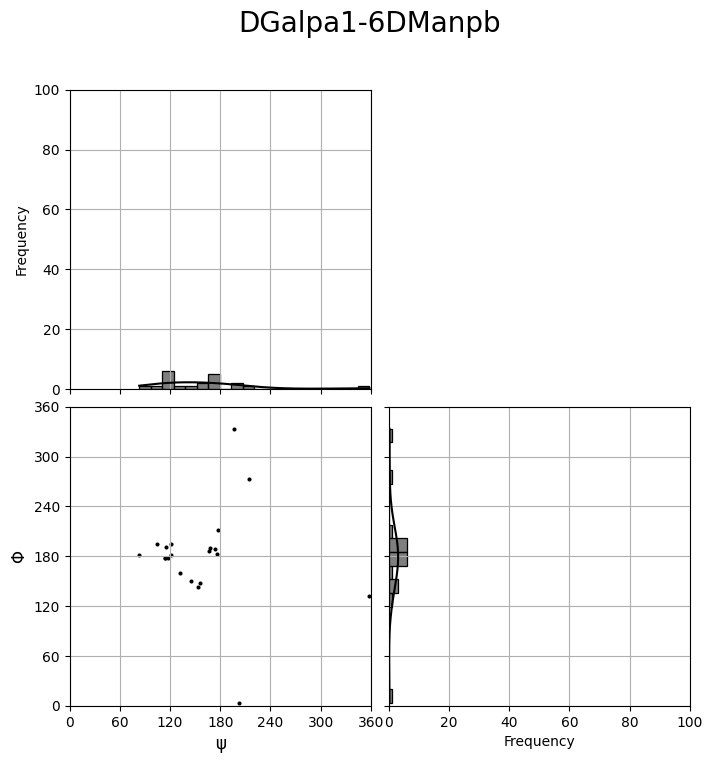

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGalpa1-6DManpb',max_histogram_scale=100,step_histogram_tick=20)